Rules for identifying ARIMA models  
https://people.duke.edu/~rnau/arimrule.htm

In [23]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [24]:
%matplotlib inline

In [25]:
df = pd.read_csv('monthly-milk-production-pounds-p.csv')
df.columns = ['Month', 'Milk in Pounds per Cow']
df

,Month,Milk in Pounds per Cow
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0
...,...,...
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


In [26]:
df.drop(168, axis=0, inplace=True)
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)
df

,Milk in Pounds per Cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0
...,...
1975-08-01,858.0
1975-09-01,817.0
1975-10-01,827.0


In [27]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Milk in Pounds per Cow,168.0,754.708333,102.204524,553.0,677.75,761.0,824.5,969.0


<AxesSubplot:xlabel='Month'>

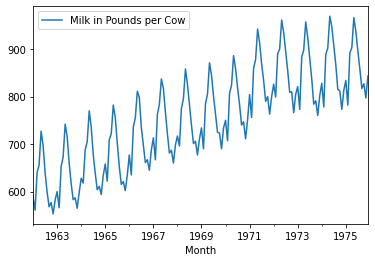

In [28]:
df.plot()

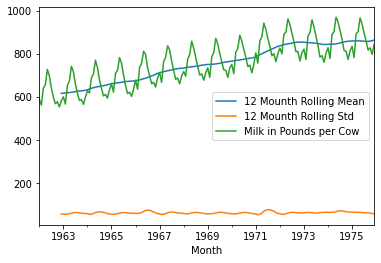

In [29]:
time_series = df['Milk in Pounds per Cow']
time_series.rolling(12).mean().plot(label='12 Mounth Rolling Mean')
time_series.rolling(12).std().plot(label='12 Mounth Rolling Std')
time_series.plot()
plt.legend()

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

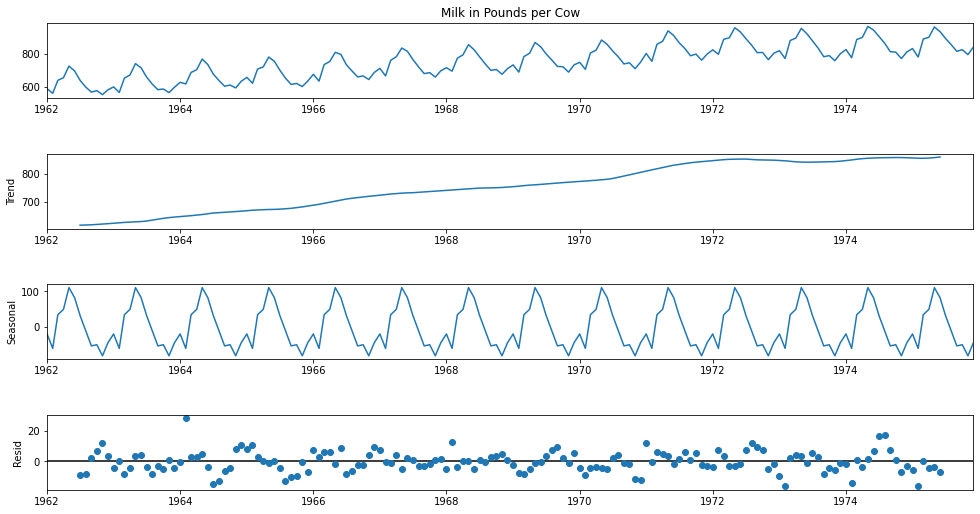

In [33]:
decomp = seasonal_decompose(time_series)
fig = decomp.plot()
fig.set_size_inches(15, 8)

In [34]:
df.head()

,Milk in Pounds per Cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [35]:
from statsmodels.tsa.stattools import adfuller

In [36]:
result = adfuller(df['Milk in Pounds per Cow'])
result

(-1.3038115874221263,
 0.6274267086030331,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 1115.1730447395112)

In [37]:
def adf_check(time_series):
    print('Augmented Dicky-Fuller Test')
    
    result = adfuller(time_series)
    labels = ['ADF Test Statistic', 'p-value', '# of lags', 'Num of Observations used']
    for value, label in zip(result, labels):
        print(label + ' : ' + str(value))
    
    if result[1] <= 0.05:
        print('Strong evidence against null hypothesis')
        print('Reject null hypothesis')
        print('Data has no unit root and it\'s stationary')
    else:
        print('Weak evidence against null hypothesis')
        print('Fail to reject null hypothesis')
        print('Data has a unit root, it is non-stationary')

In [38]:
adf_check(df['Milk in Pounds per Cow'])

Augmented Dicky-Fuller Test
ADF Test Statistic : -1.3038115874221263
p-value : 0.6274267086030331
# of lags : 13
Num of Observations used : 154
Weak evidence against null hypothesis
Fail to reject null hypothesis
Data has a unit root, it is non-stationary


<AxesSubplot:xlabel='Month'>

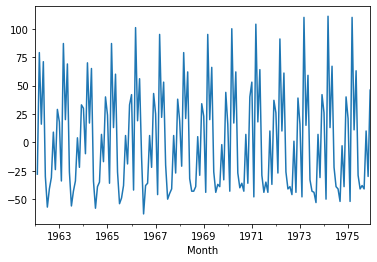

In [39]:
df['First Difference'] = df['Milk in Pounds per Cow'] - df['Milk in Pounds per Cow'].shift(1)
df['First Difference'].plot()

In [40]:
adf_check(df['First Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistic : -3.0549955586530637
p-value : 0.03006800400178615
# of lags : 14
Num of Observations used : 152
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unit root and it's stationary


<AxesSubplot:xlabel='Month'>

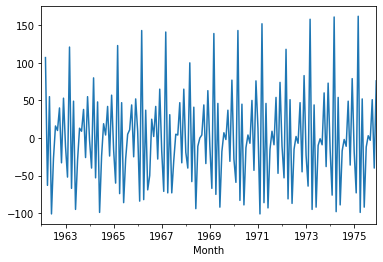

In [41]:
df['Milk Second Difference'] = df['First Difference'] - df['First Difference'].shift(1)
df['Milk Second Difference'].plot()

In [42]:
adf_check(df['Milk Second Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistic : -14.327873645603335
p-value : 1.1126989332083225e-26
# of lags : 11
Num of Observations used : 154
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unit root and it's stationary


<AxesSubplot:xlabel='Month'>

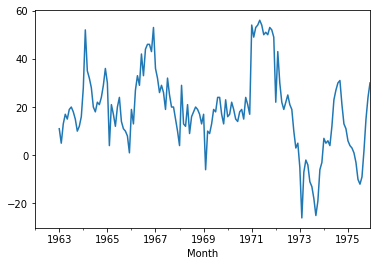

In [43]:
df['Seasonal Difference'] = df['Milk in Pounds per Cow'] - df['Milk in Pounds per Cow'].shift(12)
df['Seasonal Difference'].plot()

In [44]:
adf_check(df['Seasonal Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistic : -2.335419314359402
p-value : 0.16079880527711227
# of lags : 12
Num of Observations used : 143
Weak evidence against null hypothesis
Fail to reject null hypothesis
Data has a unit root, it is non-stationary


<AxesSubplot:xlabel='Month'>

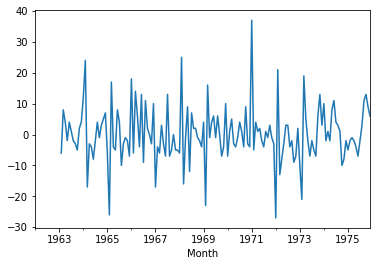

In [45]:
df['Seasonal First Difference'] = df['First Difference'] - df['First Difference'].shift(12)
df['Seasonal First Difference'].plot()

In [46]:
adf_check(df['Seasonal First Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistic : -5.038002274921985
p-value : 1.86542343187882e-05
# of lags : 11
Num of Observations used : 143
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unit root and it's stationary


In [48]:
df

,Milk in Pounds per Cow,First Difference,Milk Second Difference,Seasonal Difference,Seasonal First Difference
Month,,,,,
1962-01-01,589.0,NaN,NaN,NaN,NaN
1962-02-01,561.0,-28.0,NaN,NaN,NaN
1962-03-01,640.0,79.0,107.0,NaN,NaN
1962-04-01,656.0,16.0,-63.0,NaN,NaN
1962-05-01,727.0,71.0,55.0,NaN,NaN
...,...,...,...,...,...
1975-08-01,858.0,-38.0,3.0,-9.0,3.0
1975-09-01,817.0,-41.0,-3.0,2.0,11.0
1975-10-01,827.0,10.0,51.0,15.0,13.0


In [49]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

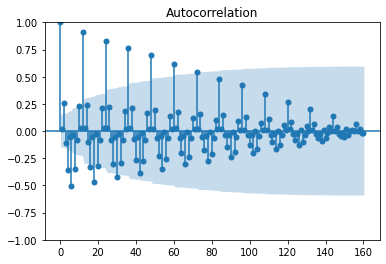

In [54]:
fig_first = plot_acf(df['First Difference'].dropna(), lags=160)

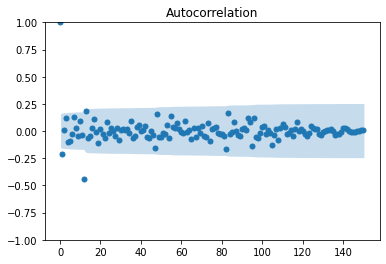

In [63]:
fig_seasonal_first = plot_acf(df['Seasonal First Difference'].dropna(), use_vlines=False, lags=150)

In [61]:
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

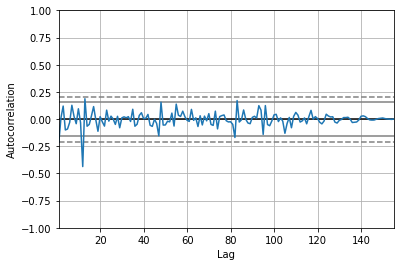

In [62]:
autocorrelation_plot(df['Seasonal First Difference'].dropna())

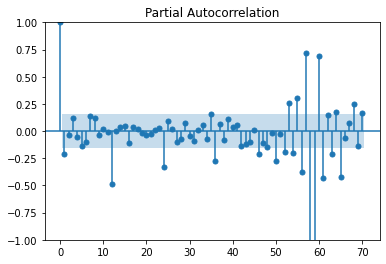

In [66]:
result = plot_pacf(df['Seasonal First Difference'].dropna(), lags=70)

C:\Users\Antonio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


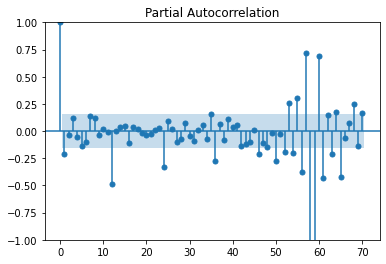

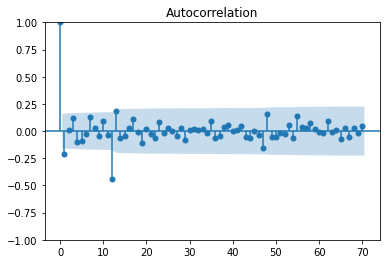

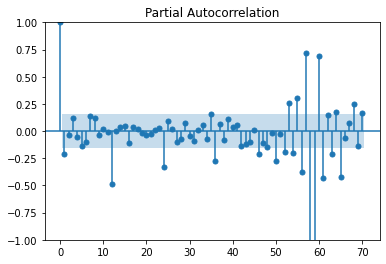

In [69]:
plot_acf(df['Seasonal First Difference'].dropna(), lags=70)
plot_pacf(df['Seasonal First Difference'].dropna(), lags=70)

In [71]:
from statsmodels.tsa.arima_model import ARIMA

In [72]:
model = sm.tsa.statespace.SARIMAX(df['Milk in Pounds per Cow'], order=(0, 1, 0), seasonal_order=(1, 1, 1, 12))
model

C:\Users\Antonio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Antonio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [74]:
result = model.fit()
print(result.summary())

                                      SARIMAX Results                                       
Dep. Variable:               Milk in Pounds per Cow   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -534.065
Date:                              Sat, 09 Apr 2022   AIC                           1074.131
Time:                                      02:22:24   BIC                           1083.261
Sample:                                  01-01-1962   HQIC                          1077.839
                                       - 12-01-1975                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0449      0.106     -0.422      0.673      -0.253       0.163
ma.S.L12      -0.58

In [75]:
result.resid

Month
1962-01-01    589.000000
1962-02-01    -28.000000
1962-03-01     79.000000
1962-04-01     16.000000
1962-05-01     71.000000
                 ...    
1975-08-01      2.641352
1975-09-01      8.158628
1975-10-01      7.676815
1975-11-01      6.572470
1975-12-01      5.936378
Length: 168, dtype: float64

<AxesSubplot:xlabel='Month'>

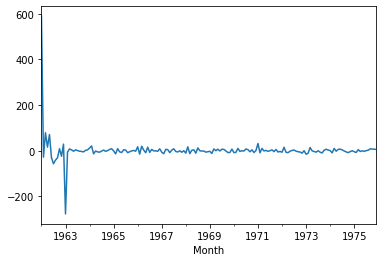

In [76]:
result.resid.plot()

<AxesSubplot:ylabel='Density'>

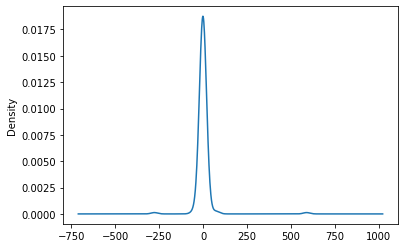

In [78]:
result.resid.plot(kind='kde')

<AxesSubplot:xlabel='Month'>

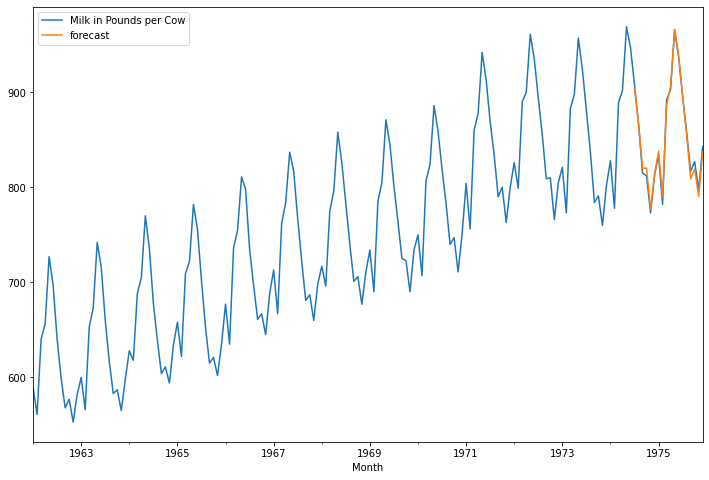

In [81]:
df['forecast'] = result.predict(start=150, end=168)
df[['Milk in Pounds per Cow', 'forecast']].plot(figsize=(12, 8))

In [82]:
df.tail()

,Milk in Pounds per Cow,First Difference,Milk Second Difference,Seasonal Difference,Seasonal First Difference,forecast
Month,,,,,,
1975-08-01,858.0,-38.0,3.0,-9.0,3.0,855.358648
1975-09-01,817.0,-41.0,-3.0,2.0,11.0,808.841372
1975-10-01,827.0,10.0,51.0,15.0,13.0,819.323185
1975-11-01,797.0,-30.0,-40.0,24.0,9.0,790.427530
1975-12-01,843.0,46.0,76.0,30.0,6.0,837.063622


In [83]:
from pandas.tseries.offsets import DateOffset

In [84]:
future_dates = [ df.index[-1] + DateOffset(months=x) for x in range(1, 24) ]
future_dates

[Timestamp('1976-01-01 00:00:00'),
 Timestamp('1976-02-01 00:00:00'),
 Timestamp('1976-03-01 00:00:00'),
 Timestamp('1976-04-01 00:00:00'),
 Timestamp('1976-05-01 00:00:00'),
 Timestamp('1976-06-01 00:00:00'),
 Timestamp('1976-07-01 00:00:00'),
 Timestamp('1976-08-01 00:00:00'),
 Timestamp('1976-09-01 00:00:00'),
 Timestamp('1976-10-01 00:00:00'),
 Timestamp('1976-11-01 00:00:00'),
 Timestamp('1976-12-01 00:00:00'),
 Timestamp('1977-01-01 00:00:00'),
 Timestamp('1977-02-01 00:00:00'),
 Timestamp('1977-03-01 00:00:00'),
 Timestamp('1977-04-01 00:00:00'),
 Timestamp('1977-05-01 00:00:00'),
 Timestamp('1977-06-01 00:00:00'),
 Timestamp('1977-07-01 00:00:00'),
 Timestamp('1977-08-01 00:00:00'),
 Timestamp('1977-09-01 00:00:00'),
 Timestamp('1977-10-01 00:00:00'),
 Timestamp('1977-11-01 00:00:00')]

In [85]:
future_df = pd.DataFrame(index=future_dates, columns=df.columns)
future_df

,Milk in Pounds per Cow,First Difference,Milk Second Difference,Seasonal Difference,Seasonal First Difference,forecast
1976-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-02-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-03-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-04-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-05-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-06-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-07-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-08-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-09-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-10-01,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
final_df = pd.concat([df, future_df])
final_df

,Milk in Pounds per Cow,First Difference,Milk Second Difference,Seasonal Difference,Seasonal First Difference,forecast
1962-01-01,589.0,NaN,NaN,NaN,NaN,NaN
1962-02-01,561.0,-28.0,NaN,NaN,NaN,NaN
1962-03-01,640.0,79.0,107.0,NaN,NaN,NaN
1962-04-01,656.0,16.0,-63.0,NaN,NaN,NaN
1962-05-01,727.0,71.0,55.0,NaN,NaN,NaN
...,...,...,...,...,...,...
1977-07-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-08-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-09-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-10-01,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
final_df['forecast'] = result.predict(start=168, end=192)
final_df.tail()

,Milk in Pounds per Cow,First Difference,Milk Second Difference,Seasonal Difference,Seasonal First Difference,forecast
1977-07-01,NaN,NaN,NaN,NaN,NaN,951.525867
1977-08-01,NaN,NaN,NaN,NaN,NaN,911.918957
1977-09-01,NaN,NaN,NaN,NaN,NaN,865.881182
1977-10-01,NaN,NaN,NaN,NaN,NaN,871.027295
1977-11-01,NaN,NaN,NaN,NaN,NaN,836.962996


<AxesSubplot:>

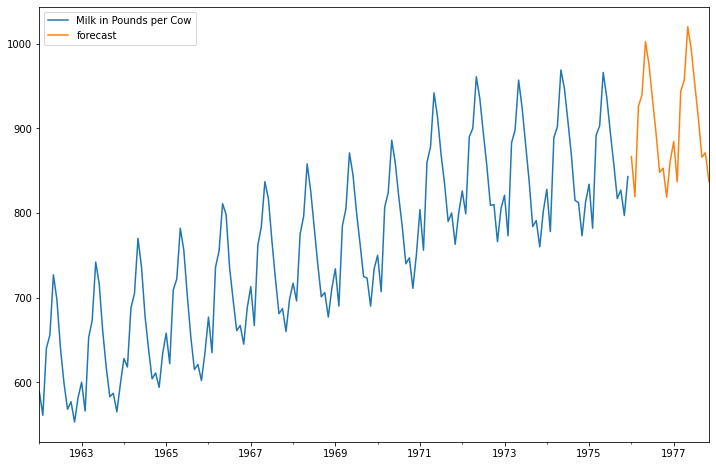

In [90]:
final_df[['Milk in Pounds per Cow', 'forecast']].plot(figsize=(12, 8))